In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Fetching and loading the csv file into a varialbe:
df = pd.read_csv("covid_19_india.csv")


In [3]:
# Displaying the csv file:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [4]:
# Dropping the columns which are not required :

df.drop(['Sno','Time'] , axis = 1 , inplace = True)

In [5]:
# To check the total number of rows and column proesent in the data frame:

df.shape

(16850, 7)

In [6]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      16850 non-null  object
 1   State/UnionTerritory      16850 non-null  object
 2   ConfirmedIndianNational   16850 non-null  object
 3   ConfirmedForeignNational  16850 non-null  object
 4   Cured                     16850 non-null  int64 
 5   Deaths                    16850 non-null  int64 
 6   Confirmed                 16850 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 921.6+ KB


In [7]:
# To show all the information of the data frame:

df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      16850 non-null  datetime64[ns]
 1   State/UnionTerritory      16850 non-null  object        
 2   ConfirmedIndianNational   16850 non-null  object        
 3   ConfirmedForeignNational  16850 non-null  object        
 4   Cured                     16850 non-null  int64         
 5   Deaths                    16850 non-null  int64         
 6   Confirmed                 16850 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 921.6+ KB


In [9]:
df[df['Date'].dt.year == 2020]

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
10077,2020-12-31,Telengana,-,-,278839,1541,286354
10078,2020-12-31,Tripura,-,-,32751,385,33264
10079,2020-12-31,Uttarakhand,-,-,84149,1504,90616
10080,2020-12-31,Uttar Pradesh,-,-,562459,8352,584966


In [10]:


df['ConfirmedIndianNational'].replace('-',np.nan , inplace = True)
df['ConfirmedForeignNational'].replace('-',np.nan , inplace = True)

In [11]:
# Checking the percentage of null values in every column:

df.isnull().sum()/df.shape[0]*100

Date                         0.000000
State/UnionTerritory         0.000000
ConfirmedIndianNational     97.353116
ConfirmedForeignNational    97.353116
Cured                        0.000000
Deaths                       0.000000
Confirmed                    0.000000
dtype: float64

In [12]:
# Dropping the columns with high percentages of null values:

df.drop(['ConfirmedForeignNational' , 'ConfirmedIndianNational'] , axis = 1 , inplace = True)

In [13]:
# Renaming the bigger column names with the smaller one for ease of reading and accessing: 

df.rename(columns = {'State/UnionTerritory' : 'State/UT'} , inplace = True)

In [14]:
# Checking wether the above two changes are properly implemented or not:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16850 non-null  datetime64[ns]
 1   State/UT   16850 non-null  object        
 2   Cured      16850 non-null  int64         
 3   Deaths     16850 non-null  int64         
 4   Confirmed  16850 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 658.3+ KB


In [15]:
# Checking the 'State/UT' column for any incorrectly named  or unecessary entries:

A = df['State/UT'].unique()
A

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [16]:
# Dropping the rows of --> df['State/UT'] == 'Cases being reassigned to states':

index_to_drop = df[df['State/UT'] == 'Cases being reassigned to states'].index
df.drop( index_to_drop , axis = 0 , inplace = True)

In [17]:
# Renaming incorrect State names with the correct ones:

df['State/UT'].replace(['Telengana','Bihar****','Dadra and Nagar Haveli' , 'Daman & Diu' , 'Dadra and Nagar Haveli and Daman and Diu'] ,
                       ['Telangana','Bihar','Dadra & Nagar Haveli & Daman & Diu','Dadra & Nagar Haveli & Daman & Diu', 'Dadra & Nagar Haveli & Daman & Diu' ] ,
                       inplace = True)


In [18]:
A = df[df['State/UT'] == 'Unassigned'].index

In [19]:
df.drop( A , axis = 0 , inplace = True) 

In [20]:
df.reset_index( inplace = True)

In [21]:
df.shape

(16787, 6)

In [22]:
df.drop(['index'] , axis = 1 , inplace = True)

In [23]:
n = df.shape[0]
Active_cases = pd.Series([])
for i in range(0 , n):
    Active_cases[i] = df['Confirmed'][i] - df['Cured'][i]
    

C:\Users\KRISH\AppData\Local\Temp\ipykernel_13204\2802844522.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Active_cases = pd.Series([])


In [24]:
df.insert(5 , 'Active_cases' , Active_cases)

In [25]:
df.shape

(16787, 6)

### Visualisation:

In [26]:
df

,Date,State/UT,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
16782,2021-07-07,Telangana,613124,3703,628282,15158
16783,2021-07-07,Tripura,63964,701,68612,4648
16784,2021-07-07,Uttarakhand,332006,7338,340882,8876
16785,2021-07-07,Uttar Pradesh,1682130,22656,1706818,24688


#### Statewise Comparision:

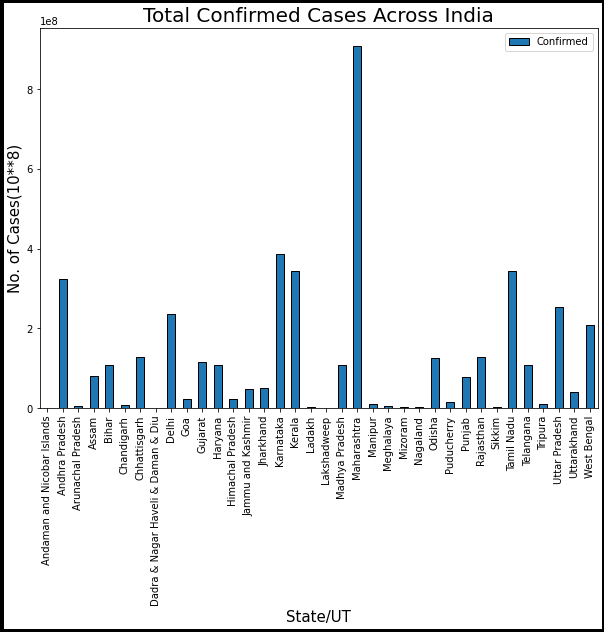

In [27]:

plt.figure(figsize = (10,7) , linewidth = 7 , edgecolor = 'black')
df.groupby(['State/UT'])['Confirmed'].sum().plot(kind = 'bar', edgecolor = 'black')
plt.title('Total Confirmed Cases Across India' , fontsize = 20)
plt.xlabel('State/UT' , fontsize = 15)
plt.ylabel('No. of Cases(10**8)' , fontsize = 15)
plt.legend()
plt.show()

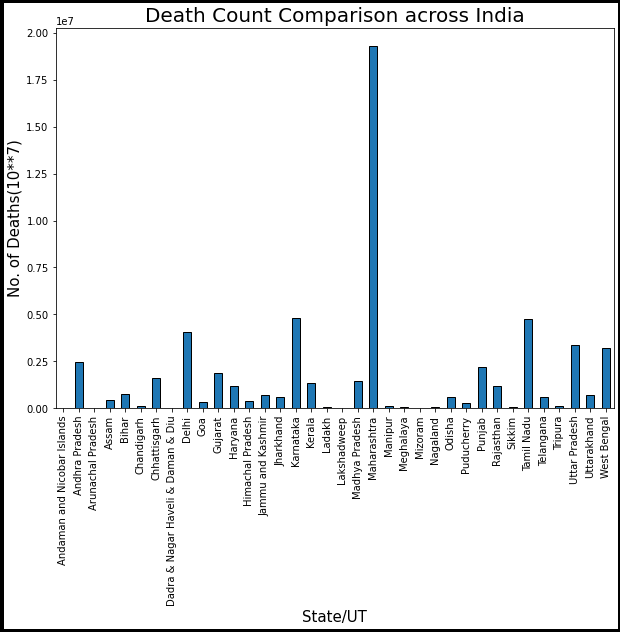

In [28]:
plt.figure(figsize = (10,7) ,  linewidth = 7 , edgecolor = 'black')
df.groupby(['State/UT'])['Deaths'].sum().plot( kind = 'bar' , edgecolor = 'black')
plt.title('Death Count Comparison across India' , fontsize = 20)
plt.xlabel('State/UT',fontsize = 15)
plt.ylabel('No. of Deaths(10**7)' , fontsize = 15)
plt.show()

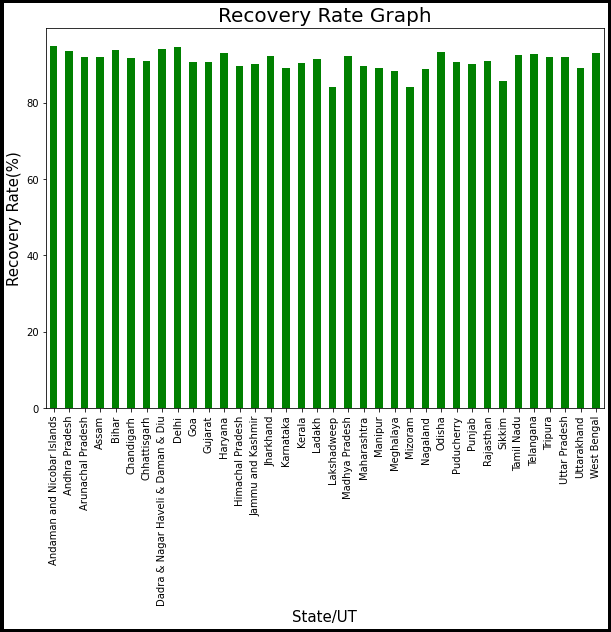

In [29]:
plt.figure(figsize = (10,7) ,  linewidth = 7 , edgecolor = 'black')
df1 = (df.groupby('State/UT')['Cured'].sum() / df.groupby('State/UT')['Confirmed'].sum())*100
df1.plot( kind = 'bar' , color = 'green')
plt.xlabel('State/UT',fontsize = 15)
plt.ylabel('Recovery Rate(%)' , fontsize = 15)
plt.title('Recovery Rate Graph' , fontsize = 20)
plt.show()

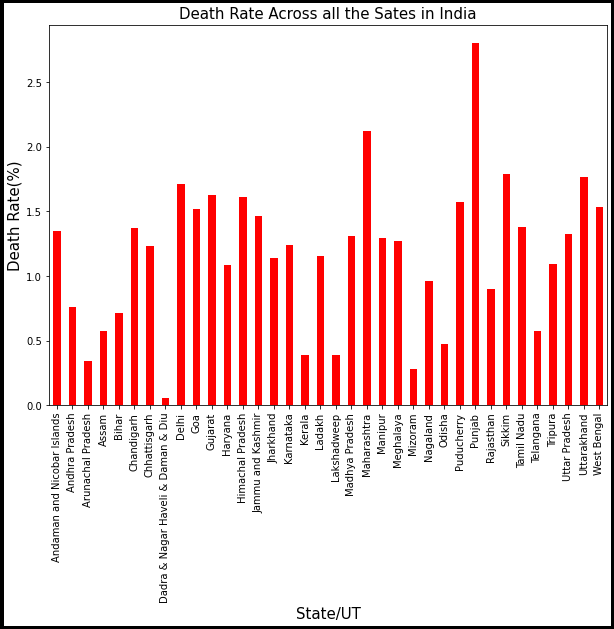

In [30]:
plt.figure(figsize = (10,7) ,  linewidth = 7 , edgecolor = 'black')
df1 = (df.groupby('State/UT')['Deaths'].sum() / df.groupby('State/UT')['Confirmed'].sum())*100
df1.plot( kind = 'bar' , color = 'red' )
plt.xlabel('State/UT',fontsize = 15)
plt.ylabel('Death Rate(%)' , fontsize = 15)
plt.title('Death Rate Across all the Sates in India' , fontsize = 15)
plt.show()

### Monthly Comparison: 

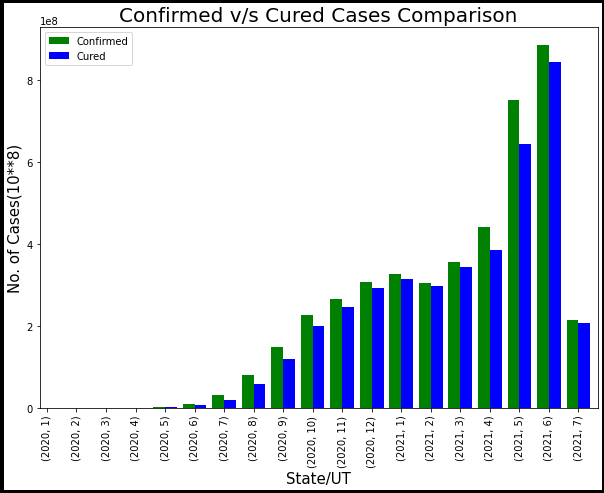

In [31]:
plt.figure(figsize = (10,7) ,  linewidth = 7 , edgecolor = 'black')
df.groupby([df['Date'].dt.year , df['Date'].dt.month])['Confirmed'].sum().plot(kind = 'bar' , color = 'green' ,width = 0.4, position = 1)
df.groupby([(df['Date'].dt.year) , (df['Date'].dt.month)] )['Cured'].sum().plot(kind = 'bar' , color = 'blue' , width = 0.4 ,position = 0)
plt.xlabel('State/UT',fontsize = 15)
plt.ylabel('No. of Cases(10**8)' , fontsize = 15)
plt.title('Confirmed v/s Cured Cases Comparison' , fontsize = 20)
plt.legend()
plt.show()

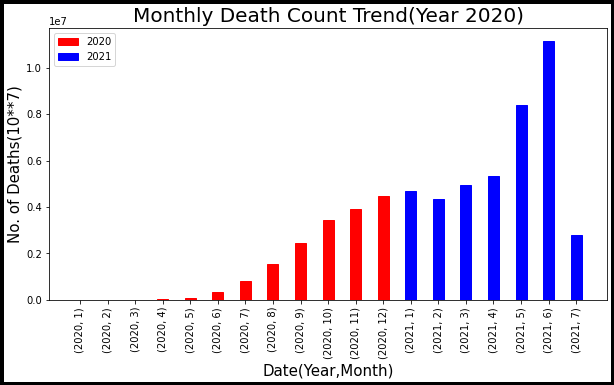

In [32]:
df2 = df.groupby([df['Date'].dt.year , df['Date'].dt.month])['Deaths'].sum()
a = dict(df2)

fig = plt.figure(figsize = (10, 5) , linewidth = 7 , edgecolor = 'black')
year = list(a.keys())
years = list(map(str , year))
count = list(a.values())

barlist = plt.bar(years, count, width = 0.4)
for i in range(0,12):
    barlist[i].set_color('r')
for j in range(12,19):
    barlist[j].set_color('b')
    
plt.xticks( rotation = 90 )
plt.xlabel('Date(Year,Month)' , fontsize = 15)
plt.ylabel('No. of Deaths(10**7)' , fontsize = 15)
plt.title('Monthly Death Count Trend(Year 2020)' , fontsize = 20)


colors = {'2020':'red', '2021':'blue'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()



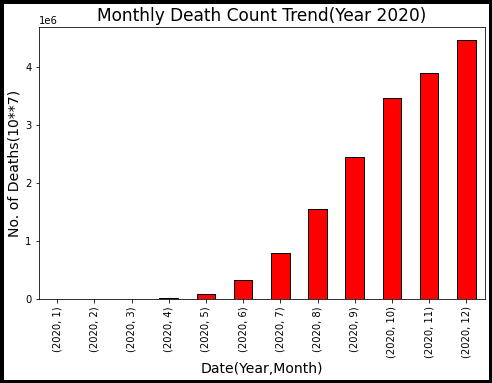

In [33]:
df1 = df[df['Date'].dt.year == 2020]

plt.figure(figsize = (8,5) , linewidth = 7 , edgecolor = 'black')

df1.groupby([df['Date'].dt.year , df1['Date'].dt.month])['Deaths'].sum().plot(kind = 'bar' , color = 'red' , edgecolor = 'black')

plt.title('Monthly Death Count Trend(Year 2020)' , fontsize = 17)
plt.xlabel('Date(Year,Month)' , fontsize = 14)
plt.ylabel('No. of Deaths(10**7)' , fontsize = 14)

plt.show()

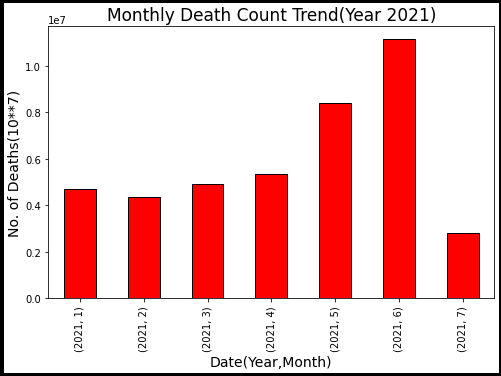

In [34]:
df1 = df[df['Date'].dt.year == 2021]
plt.figure(figsize = (8,5) , linewidth = 7 , edgecolor = 'black')
df1.groupby([df['Date'].dt.year , df1['Date'].dt.month])['Deaths'].sum().plot(kind = 'bar' , color = 'red' , edgecolor = 'black')
plt.title('Monthly Death Count Trend(Year 2021)' , fontsize = 17)
plt.xlabel('Date(Year,Month)' , fontsize = 14)
plt.ylabel('No. of Deaths(10**7)' , fontsize = 14)
plt.show()

### Visualisation of Maharaashtra:

In [35]:
df1 = df[df['State/UT'] == 'Maharashtra']

In [36]:
df1.head()

,Date,State/UT,Cured,Deaths,Confirmed,Active_cases
76,2020-03-09,Maharashtra,0,0,2,2
91,2020-03-10,Maharashtra,0,0,5,5
97,2020-03-11,Maharashtra,0,0,2,2
120,2020-03-12,Maharashtra,0,0,11,11
133,2020-03-13,Maharashtra,0,0,14,14


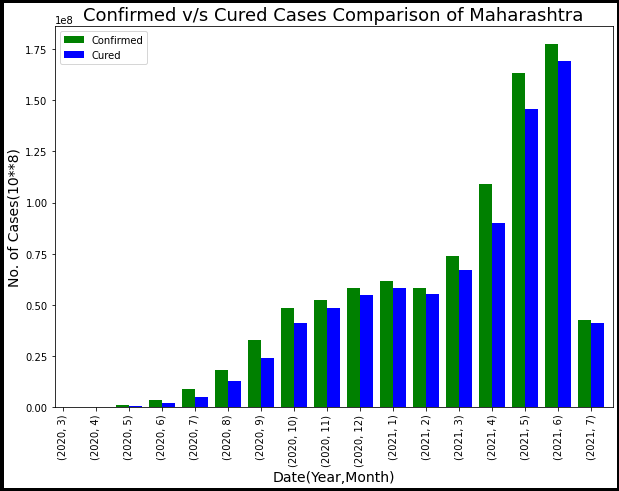

In [37]:
plt.figure(figsize = (10,7) ,  linewidth = 7 , edgecolor = 'black')
df1.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Confirmed'].sum().plot(kind = 'bar' , color = 'green' ,width = 0.4, position = 1)
df1.groupby([(df1['Date'].dt.year) , (df1['Date'].dt.month)] )['Cured'].sum().plot(kind = 'bar' , color = 'blue' , width = 0.4 ,position = 0)

plt.xlabel('Date(Year,Month)' , fontsize = 14)
plt.ylabel("No. of Cases(10**8)" , fontsize = 14)
plt.title('Confirmed v/s Cured Cases Comparison of Maharashtra' , fontsize = 18)

plt.legend()

plt.show()

In [38]:
df.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Deaths'].mean()

Date    Date
2020.0  3.0          2.130435
        4.0        178.466667
        5.0       1157.806452
        6.0       4709.566667
        7.0      11063.806452
        8.0      19677.258065
        9.0      30276.900000
        10.0     40938.032258
        11.0     45764.500000
        12.0     48356.838710
2021.0  1.0      50307.612903
        2.0      51533.607143
        3.0      53049.838710
        4.0      59844.600000
        5.0      81250.000000
        6.0     110318.933333
        7.0     122702.285714
Name: Deaths, dtype: float64

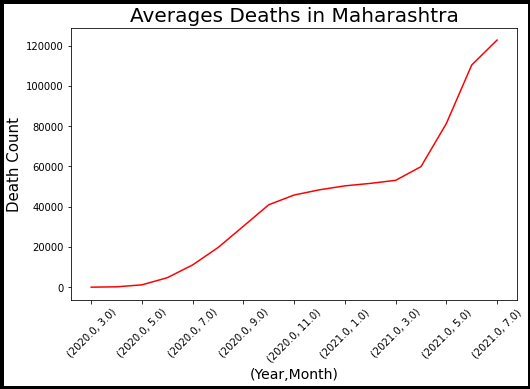

In [44]:

plt.figure(figsize = (8,5) , linewidth = 7 , edgecolor = 'black')
df.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Deaths'].mean().plot(kind = 'line' , color = 'red' )

plt.xticks( rotation = 45)

plt.xlabel('(Year,Month)' , fontsize = 14)
plt.ylabel('Death Count' , fontsize = 15)
plt.title('Averages Deaths in Maharashtra' , fontsize = 20)

plt.show()

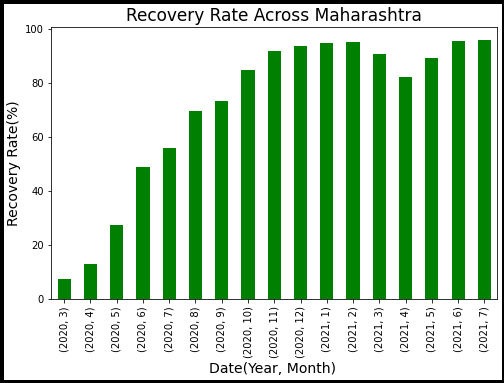

In [42]:
a = df1.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Cured'].sum()
b = df1.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Confirmed'].sum()
df2 = (a/b)*100

plt.figure(figsize = (8,5) , linewidth = 7 , edgecolor = 'black')

df2.plot( kind = 'bar' , color = 'green')

plt.xlabel('Date(Year, Month) ', fontsize = 14)
plt.ylabel('Recovery Rate(%)' , fontsize = 14)
plt.title('Recovery Rate Across Maharashtra' , fontsize = 17)

plt.show()

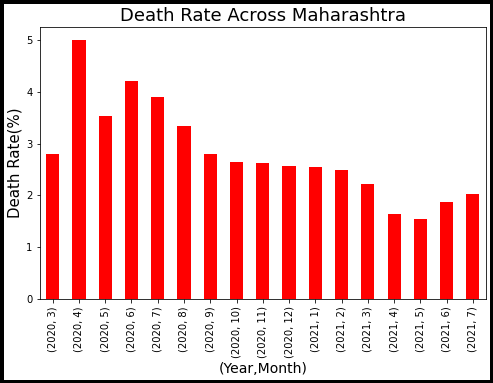

In [43]:
a = df1.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Deaths'].sum()
b = df1.groupby([df1['Date'].dt.year , df1['Date'].dt.month])['Confirmed'].sum()
df2 = (a/b)*100

plt.figure(figsize = (8,5) , linewidth = 7 , edgecolor = 'black')

df2.plot( kind = 'bar' , color = 'red')

plt.xlabel('(Year,Month)' , fontsize = 14)
plt.ylabel('Death Rate(%)' , fontsize = 15)
plt.title("Death Rate Across Maharashtra", fontsize = 18)

plt.show()